### Dagger 

In [1]:
import tempfile
import numpy as np
import gymnasium as gym
from stable_baselines3.common.evaluation import evaluate_policy
from imitation.algorithms import bc
from imitation.algorithms.dagger import SimpleDAggerTrainer
from imitation.util.util import make_vec_env

# Initialize a random number generator
rng = np.random.default_rng(0)

# Create the environment
env = make_vec_env("CartPole-v1", n_envs=1, rng=rng)

# Define a simple expert policy (use stable-baselines3 pre-trained model)
from stable_baselines3 import PPO

expert_model = PPO("MlpPolicy", env, verbose=0)
expert_model.learn(10_000)  # Train the expert policy

# Define a behavioral cloning trainer
bc_trainer = bc.BC(
    observation_space=env.observation_space,
    action_space=env.action_space,
    rng=rng,
)

# Create a temporary directory for DAgger
with tempfile.TemporaryDirectory(prefix="dagger_example_") as tmpdir:
    print(f"Temporary directory: {tmpdir}")
    
    # Create the DAgger trainer
    dagger_trainer = SimpleDAggerTrainer(
        venv=env,
        scratch_dir=tmpdir,
        expert_policy=expert_model.policy,  # Expert policy is taken from PPO
        bc_trainer=bc_trainer,
        rng=rng,
    )
    
    # Train the DAgger model
    dagger_trainer.train(8_000)

# Evaluate the DAgger-trained policy
reward, _ = evaluate_policy(dagger_trainer.policy, env, n_eval_episodes=10)
print("Reward after DAgger training:", reward)


Temporary directory: C:\Users\Sorbonne\AppData\Local\Temp\dagger_example_79yr2ylx


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000693 |
|    entropy        | 0.693     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 72.5      |
|    loss           | 0.692     |
|    neglogp        | 0.693     |
|    prob_true_act  | 0.5       |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 31        |
|    return_mean    | 20.4      |
|    return_min     | 11        |
|    return_std     | 7.39      |
---------------------------------


152batch [00:00, 171.85batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000381 |
|    entropy        | 0.381     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 85.9      |
|    loss           | 0.274     |
|    neglogp        | 0.274     |
|    prob_true_act  | 0.799     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 158       |
|    return_mean    | 110       |
|    return_min     | 68        |
|    return_std     | 29        |
---------------------------------


264batch [00:01, 144.49batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -0.00015 |
|    entropy        | 0.15     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 94.6     |
|    loss           | 0.113    |
|    neglogp        | 0.113    |
|    prob_true_act  | 0.921    |
|    samples_so_far | 32       |
| rollout/          |          |
|    return_max     | 250      |
|    return_mean    | 190      |
|    return_min     | 142      |
|    return_std     | 40.3     |
--------------------------------


372batch [00:03, 111.38batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000132 |
|    entropy        | 0.132     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 110       |
|    loss           | 0.0852    |
|    neglogp        | 0.0854    |
|    prob_true_act  | 0.938     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 269       |
|    return_min     | 199       |
|    return_std     | 116       |
---------------------------------


452batch [00:03, 142.89batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000193 |
|    entropy        | 0.193     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 132       |
|    loss           | 0.133     |
|    neglogp        | 0.134     |
|    prob_true_act  | 0.894     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 419       |
|    return_mean    | 263       |
|    return_min     | 191       |
|    return_std     | 87.1      |
---------------------------------


481batch [00:03, 213.12batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -9.78e-05 |
|    entropy        | 0.0978    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 157       |
|    loss           | 0.0612    |
|    neglogp        | 0.0613    |
|    prob_true_act  | 0.951     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 244       |
|    return_mean    | 221       |
|    return_min     | 193       |
|    return_std     | 19        |
---------------------------------


572batch [00:04, 135.74batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -8.11e-05 |
|    entropy        | 0.0811    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 161       |
|    loss           | 0.0511    |
|    neglogp        | 0.0512    |
|    prob_true_act  | 0.959     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 349       |
|    return_min     | 193       |
|    return_std     | 98.4      |
---------------------------------


489batch [00:03, 210.04batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 500      |
|    ent_loss       | -0.00013 |
|    entropy        | 0.13     |
|    epoch          | 3        |
|    l2_loss        | 0        |
|    l2_norm        | 180      |
|    loss           | 0.0888   |
|    neglogp        | 0.0889   |
|    prob_true_act  | 0.931    |
|    samples_so_far | 16032    |
| rollout/          |          |
|    return_max     | 370      |
|    return_mean    | 277      |
|    return_min     | 196      |
|    return_std     | 64       |
--------------------------------


660batch [00:04, 138.97batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -6.2e-05 |
|    entropy        | 0.062    |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 187      |
|    loss           | 0.0449   |
|    neglogp        | 0.045    |
|    prob_true_act  | 0.967    |
|    samples_so_far | 32       |
| rollout/          |          |
|    return_max     | 381      |
|    return_mean    | 278      |
|    return_min     | 192      |
|    return_std     | 80.6     |
--------------------------------


487batch [00:03, 222.57batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -0.000114 |
|    entropy        | 0.114     |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 203       |
|    loss           | 0.143     |
|    neglogp        | 0.143     |
|    prob_true_act  | 0.91      |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 300       |
|    return_min     | 184       |
|    return_std     | 114       |
---------------------------------


768batch [00:05, 149.96batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -3.23e-05 |
|    entropy        | 0.0323    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 211       |
|    loss           | 0.018     |
|    neglogp        | 0.018     |
|    prob_true_act  | 0.985     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 343       |
|    return_min     | 192       |
|    return_std     | 117       |
---------------------------------


491batch [00:03, 226.29batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -8.38e-05 |
|    entropy        | 0.0838    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 226       |
|    loss           | 0.0363    |
|    neglogp        | 0.0364    |
|    prob_true_act  | 0.968     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 328       |
|    return_min     | 219       |
|    return_std     | 104       |
---------------------------------


884batch [00:05, 149.37batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -9.37e-05 |
|    entropy        | 0.0937    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 234       |
|    loss           | 0.0526    |
|    neglogp        | 0.0527    |
|    prob_true_act  | 0.956     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 400       |
|    return_mean    | 306       |
|    return_min     | 208       |
|    return_std     | 73.9      |
---------------------------------


494batch [00:03, 210.26batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -7.72e-05 |
|    entropy        | 0.0772    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 245       |
|    loss           | 0.0423    |
|    neglogp        | 0.0424    |
|    prob_true_act  | 0.965     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 300       |
|    return_min     | 208       |
|    return_std     | 111       |
---------------------------------


960batch [00:06, 153.58batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -5.7e-05 |
|    entropy        | 0.057    |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 255      |
|    loss           | 0.0327   |
|    neglogp        | 0.0327   |
|    prob_true_act  | 0.973    |
|    samples_so_far | 32       |
| rollout/          |          |
|    return_max     | 450      |
|    return_mean    | 280      |
|    return_min     | 195      |
|    return_std     | 97.8     |
--------------------------------


483batch [00:03, 216.13batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -8.81e-05 |
|    entropy        | 0.0881    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 265       |
|    loss           | 0.0485    |
|    neglogp        | 0.0486    |
|    prob_true_act  | 0.959     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 473       |
|    return_mean    | 295       |
|    return_min     | 174       |
|    return_std     | 105       |
---------------------------------


980batch [00:06, 205.43batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -5.98e-05 |
|    entropy        | 0.0598    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 274       |
|    loss           | 0.232     |
|    neglogp        | 0.232     |
|    prob_true_act  | 0.933     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | 354       |
|    return_mean    | 303       |
|    return_min     | 217       |
|    return_std     | 48.2      |
---------------------------------


1084batch [00:07, 140.40batch/s]


Reward after DAgger training: 326.6


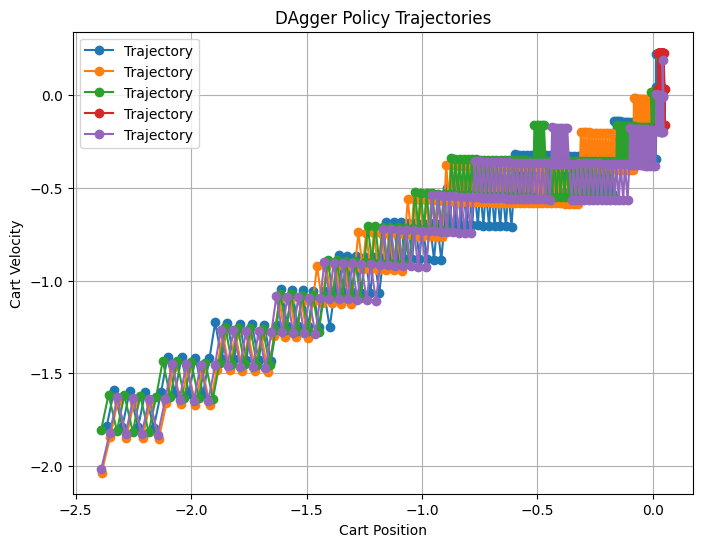

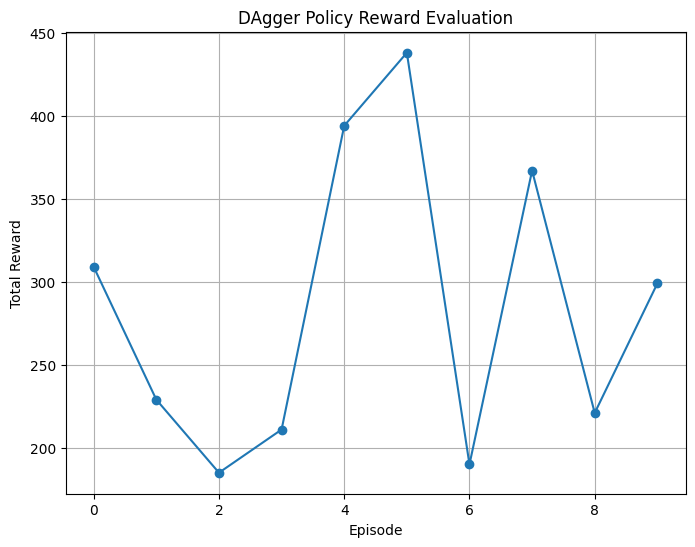

Average Reward: 284.30


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize policy performance over multiple episodes
def plot_policy_trajectories(policy, env, title="Policy Trajectories", num_episodes=5):
    trajectories = []
    for _ in range(num_episodes):
        obs = env.reset()
        done = False
        trajectory = []
        while not done:
            # Predict the action using the trained policy
            action, _ = policy.predict(obs, deterministic=True)
            
            # Append the current position (Cart Position, Cart Velocity)
            env_state = env.get_attr("state")[0]  # Access the state of the underlying environment
            trajectory.append(env_state)
            
            # Step the environment
            obs, _, done, _ = env.step(action)
        trajectories.append(trajectory)

    # Plot the trajectories
    plt.figure(figsize=(8, 6))
    for trajectory in trajectories:
        trajectory = np.array(trajectory)
        plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', label="Trajectory")
    plt.title(title)
    plt.xlabel("Cart Position")
    plt.ylabel("Cart Velocity")
    plt.legend()
    plt.grid()
    plt.show()

# Function to evaluate and plot rewards
def plot_rewards(policy, env, title="Reward Evaluation", num_episodes=10):
    rewards = []
    for _ in range(num_episodes):
        obs = env.reset()
        done = False
        episode_reward = 0
        while not done:
            # Predict the action using the trained policy
            action, _ = policy.predict(obs, deterministic=True)
            
            # Step the environment and accumulate reward
            obs, reward, done, _ = env.step(action)
            episode_reward += reward
        rewards.append(episode_reward)

    # Plot rewards
    plt.figure(figsize=(8, 6))
    plt.plot(rewards, marker='o')
    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid()
    plt.show()
    print(f"Average Reward: {np.mean(rewards):.2f}")

# Plot the DAgger policy trajectories
plot_policy_trajectories(dagger_trainer.policy, env, title="DAgger Policy Trajectories")

# Plot the rewards achieved by the DAgger-trained policy
plot_rewards(dagger_trainer.policy, env, title="DAgger Policy Reward Evaluation")


In [3]:
!pip install imitation --default-timeout=100


In [ ]:
import numpy as np
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.ppo import MlpPolicy

from imitation.algorithms.adversarial.airl import AIRL
from imitation.data import rollout
from imitation.data.wrappers import RolloutInfoWrapper
from imitation.policies.serialize import load_policy
from imitation.rewards.reward_nets import BasicShapedRewardNet
from imitation.util.networks import RunningNorm
from imitation.util.util import make_vec_env

SEED = 42

env = make_vec_env(
    "seals:seals/CartPole-v0",
    rng=np.random.default_rng(SEED),
    n_envs=8,
    post_wrappers=[lambda env, _: RolloutInfoWrapper(env)],  # to compute rollouts
)
expert = load_policy(
    "ppo-huggingface",
    organization="HumanCompatibleAI",
    env_name="seals-CartPole-v0",
    venv=env,
)
rollouts = rollout.rollout(
    expert,
    env,
    rollout.make_sample_until(min_episodes=60),
    rng=np.random.default_rng(SEED),
)

learner = PPO(
    env=env,
    policy=MlpPolicy,
    batch_size=64,
    ent_coef=0.0,
    learning_rate=0.0005,
    gamma=0.95,
    clip_range=0.1,
    vf_coef=0.1,
    n_epochs=5,
    seed=SEED,
)
reward_net = BasicShapedRewardNet(
    observation_space=env.observation_space,
    action_space=env.action_space,
    normalize_input_layer=RunningNorm,
)
airl_trainer = AIRL(
    demonstrations=rollouts,
    demo_batch_size=2048,
    gen_replay_buffer_capacity=512,
    n_disc_updates_per_round=16,
    venv=env,
    gen_algo=learner,
    reward_net=reward_net,
)

env.seed(SEED)
learner_rewards_before_training, _ = evaluate_policy(
    learner, env, 100, return_episode_rewards=True,
)
airl_trainer.train(20000)  # Train for 2_000_000 steps to match expert.
env.seed(SEED)
learner_rewards_after_training, _ = evaluate_policy(
    learner, env, 100, return_episode_rewards=True,
)

print("mean reward after training:", np.mean(learner_rewards_after_training))
print("mean reward before training:", np.mean(learner_rewards_before_training))

c:\Users\Sorbonne\miniforge3\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object learning_rate. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
c:\Users\Sorbonne\miniforge3\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
c:\Users\Sorbonne\miniforge3\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
round:   0%|          | 0/1 [00:00<?, ?it/s]

------------------------------------------
| raw/                        |          |
|    gen/rollout/ep_len_mean  | 500      |
|    gen/rollout/ep_rew_mean  | 33.1     |
|    gen/time/fps             | 3108     |
|    gen/time/iterations      | 1        |
|    gen/time/time_elapsed    | 5        |
|    gen/time/total_timesteps | 16384    |
------------------------------------------
--------------------------------------------------
| raw/                                |          |
|    disc/disc_acc                    | 0.581    |
|    disc/disc_acc_expert             | 1        |
|    disc/disc_acc_gen                | 0.162    |
|    disc/disc_entropy                | 0.664    |
|    disc/disc_loss                   | 0.676    |
|    disc/disc_proportion_expert_pred | 0.919    |
|    disc/disc_proportion_expert_true | 0.5      |
|    disc/global_step                 | 1        |
|    disc/n_expert                    | 2.05e+03 |
|    disc/n_generated                 | 2.05e+03 |
-

round: 100%|██████████| 1/1 [00:12<00:00, 12.22s/it]


mean reward after training: 8.22
mean reward before training: 102.6


c:\Users\Sorbonne\miniforge3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.state` for environment variables or `env.get_wrapper_attr('state')` that will search the reminding wrappers.
  logger.warn(
c:\Users\Sorbonne\miniforge3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.state` for environment variables or `env.get_wrapper_attr('state')` that will search the reminding wrappers.
  logger.warn(
c:\Users\Sorbonne\miniforge3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.state` for environment variables or `env.get_wrapper_attr('state')` that w

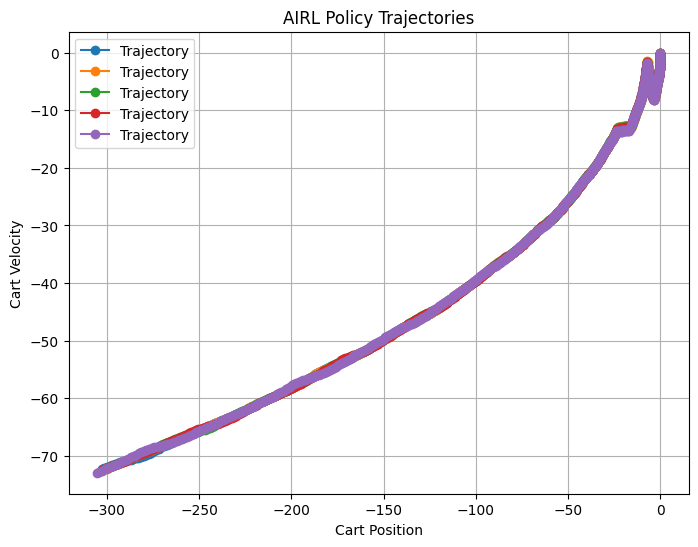

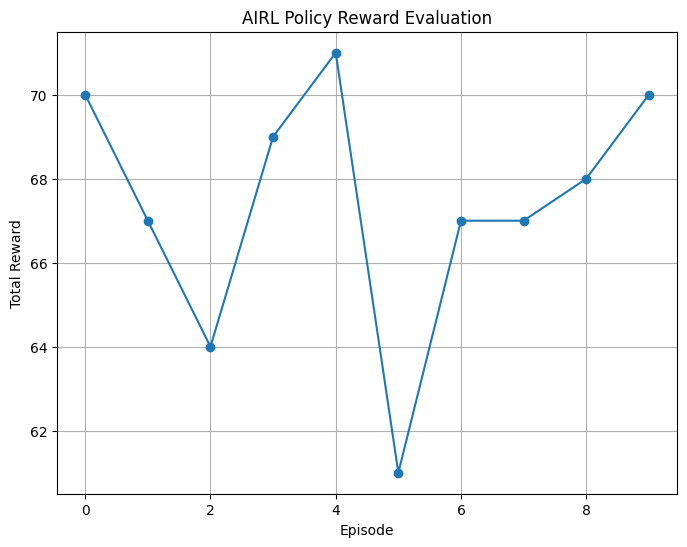

Average Reward: 67.40


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize AIRL policy performance over multiple episodes
def plot_airl_policy_trajectories(policy, env, title="AIRL Policy Trajectories", num_episodes=5):
    trajectories = []
    for _ in range(num_episodes):
        obs = env.reset()
        done = [False] * env.num_envs  # Initialize as list of "False" for vectorized environments
        trajectory = []
        while not np.any(done):  # Continue until at least one environment is done
            # Predict the action using the trained policy
            action, _ = policy.predict(obs, deterministic=True)
            
            # Append the current position (Cart Position, Cart Velocity)
            env_state = env.envs[0].state if hasattr(env.envs[0], "state") else None
            if env_state is not None:
                trajectory.append(env_state)
            
            # Step the environment
            obs, _, done, _ = env.step(action)
        trajectories.append(trajectory)

    # Plot the trajectories
    plt.figure(figsize=(8, 6))
    for trajectory in trajectories:
        if trajectory:  # Ensure the trajectory is not empty
            trajectory = np.array(trajectory)
            plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', label="Trajectory")
    plt.title(title)
    plt.xlabel("Cart Position")
    plt.ylabel("Cart Velocity")
    plt.legend()
    plt.grid()
    plt.show()

# Function to evaluate and plot rewards achieved by the AIRL-trained policy
def plot_airl_rewards(policy, env, title="AIRL Reward Evaluation", num_episodes=10):
    rewards = []
    for _ in range(num_episodes):
        obs = env.reset()
        done = [False] * env.num_envs  # Initialize as list of "False" for vectorized environments
        episode_reward = 0
        while not np.any(done):  # Continue until at least one environment is done
            # Predict the action using the trained policy
            action, _ = policy.predict(obs, deterministic=True)
            
            # Step the environment and accumulate reward
            obs, reward, done, _ = env.step(action)
            episode_reward += np.sum(reward)  # Sum rewards across all environments
        rewards.append(episode_reward)

    # Plot rewards
    plt.figure(figsize=(8, 6))
    plt.plot(rewards, marker='o')
    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid()
    plt.show()
    print(f"Average Reward: {np.mean(rewards):.2f}")

# Plot AIRL policy trajectories
plot_airl_policy_trajectories(airl_trainer.gen_algo.policy, env, title="AIRL Policy Trajectories")

# Plot rewards achieved by the AIRL-trained policy
plot_airl_rewards(airl_trainer.gen_algo.policy, env, title="AIRL Policy Reward Evaluation")
